In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data
from pandas_datareader import data as pdr
import fix_yahoo_finance
from datetime import datetime

#BTCUSD- Bitcoin USD
#ETH-USD-Ethereum USD
#VERI-USD-Veritaseum USD
#ZEC-USD-ZCASH USD
#company_list=['BTC-USD','ETH-USD','VERI-USD','ZEC-USD']
#LC- lending club
#GSPC- S&P500
company_list=['LC']
current=datetime.now()
# Lets start analysing the stock price one year from today
start=datetime(current.year-1,current.month,current.day)
for ticker in company_list:
    #taking string and making it a global variable
    globals()[ticker]=pdr.get_data_yahoo(ticker,start,current)
    
     


In [2]:

LC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-03-08 to 2018-03-08
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


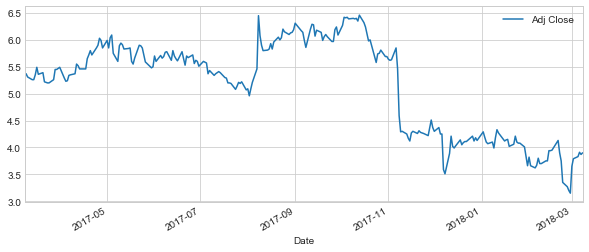

In [3]:
#daily trade price with respect to time
LC['Adj Close'].plot(legend=True,figsize=(10,4))

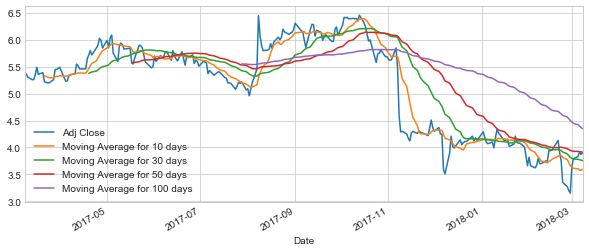

In [4]:
#moving average of the stock price
#When a short-term moving average is above a long-term moving average, that means that the trend is higher or bullish, and vice versa for short-term moving averages below long-term moving averages.
#setting subplot to false to have them in a single graph
ma_range=[10,30,50,100,200]
for ma in ma_range:
    column_name="Moving Average for %s days" %(str(ma))
    LC[column_name]=pd.Series(LC['Adj Close']).rolling(window=ma).mean()   

LC[['Adj Close','Moving Average for 10 days','Moving Average for 30 days','Moving Average for 50 days','Moving Average for 100 days']].plot(subplots=False,figsize=(10,4))

    


In [5]:
#daily return and risk of the stock


In [6]:
LC['Daily Return']=LC['Adj Close'].pct_change()

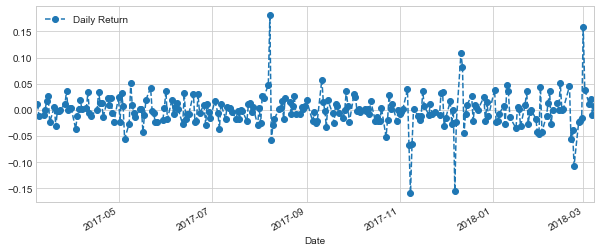

In [7]:
LC['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

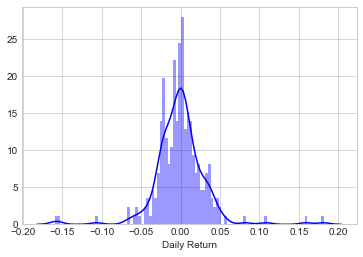

In [8]:
sns.distplot(LC['Daily Return'].dropna(),bins=100,color='blue')

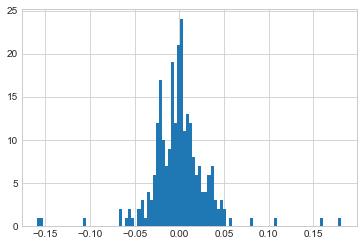

In [9]:
LC['Daily Return'].hist(bins=100)

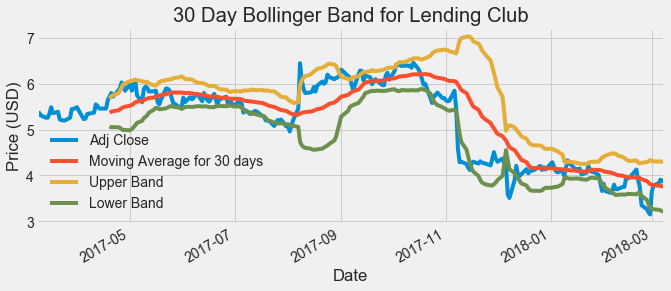

In [12]:
# Simple 30 Day Bollinger Band for Lending Club (2017-2018)
LC['30 Day STD'] = LC['Adj Close'].rolling(window=20).std()
LC['Upper Band'] = LC['Moving Average for 30 days'] + (LC['30 Day STD'] * 2)
LC['Lower Band'] = LC['Moving Average for 30 days'] - (LC['30 Day STD'] * 2)
LC[['Adj Close', 'Moving Average for 30 days', 'Upper Band', 'Lower Band']].plot(figsize=(10,4))
plt.title('30 Day Bollinger Band for Lending Club')
plt.ylabel('Price (USD)')
plt.show()

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(4,6))
#ax = fig.add_subplot(111)

# Get index values for the X axis for  Lending Club DataFrame
x_axis = LC.index.get_level_values(0)



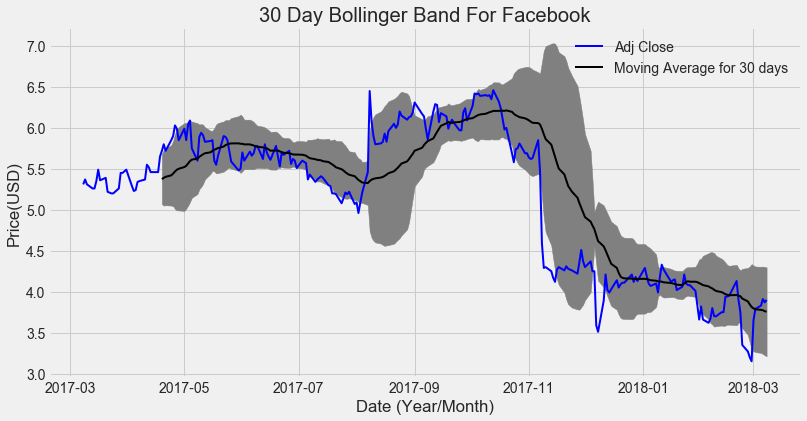

In [13]:
# Plot shaded 21 Day Bollinger Band for Facebook
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = LC.index.get_level_values(0)

ax.fill_between(x_axis, LC['Upper Band'], LC['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, LC['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, LC['Moving Average for 30 days'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Facebook')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()